<a href="https://colab.research.google.com/github/CastilloEdaUnam/Notas/blob/main/EficienciaAlgoritmica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Conceptos previos**

A continuación se ofrecen algunos conceptos previos necesarios para entender la evaluación del tiempo de ejecución de un algoritmo

##***Suma de los primeros números naturales***

La suma de los primeros n numero naturales es:

1+2+3...+(n-3)+(n-2)+(n-1)= **n(n+1)/2**

* La suma de los primeros n-1 numeros naturales es:

>> **(n-1)n/2**


* La suma de los primeros n+1 numeros naturales es:

>> **(n+1)(n+2)/2**

* La suma de los numeros entre 2 y n está dada por:

>> 2+3+4+...+(n-1)+n = (-1 + 1) + 2 +3 + 4 + ... + (n-1) + n

>Con lo que la ecuacion es:

>>**2+3+4+...+(n-1)+n = n(n+1))/2 - 1**

##**tiempo de ejcución de una función**

[¿Cómo medir el tiempo de ejecución de un fragmento de código?](https://ellibrodepython.com/tiempo-ejecucion-python)

---
##Creacion de un vector de numeros aleatorios

El siguiente código crea un vector de 10 **números aleatorios no repetidos** entre 0 y 99.

In [ ]:
import random

v = random.sample(range(100), 10)
print(v)

[71, 16, 68, 14, 79, 28, 6, 59, 24, 57]


El siguiente código crea un vector de 20 números aleatorios no repetidos entre 50 y 99.

In [ ]:
import random

v = random.sample(range(50,100), 10)
print(v)

[57, 92, 95, 53, 51, 77, 56, 72, 75, 78]


#Evaluación del tiempo de ejecución de un algoritmo

El tiempo de ejecución de un algoritmo está intimamente ligado a tres factores:

* El número de instrucciónes que deben ejecutarse en el algoritmo
* Las prestaciones que de la computadora donde se ejecutará el algoritmo
* El sistema operativo de la computadora donde se ejecutará el algorítmo

El primer factor es totalmente independiente de la computadora, dependiendo unicamente de los datos de entrada del algoritmo, Mientras que los otros dos son totalmente dependientes.

Una evaluación util deberá por tomar en cuenta las instrucciones y, de alguna forma, minimizar la influencia del los ptros factores. Aunque cada instrucción de un algoritmo se descompone en varias instrucciones del bajo nivel, es acptable, desde un punto de vista ingenieríl, pensar que una aproximación aceptable es concentrarse en las operaciones de alto nivel. Diferentes autores evaluan estas instruccione de diferente manera, sin embar en este texto simplemente consideraremos las instrucción de una manera general, y supondremos que para fines prácticos el numero de instrucciones es proporcional al tiempo de ejecución del algoritmo, y ese factor de proporcionalidad engloba la arquitectura de la computadora, el sistema operativo y las equivalencias entre instrucciones de alto nivel y las instrucciones de bajo nivel.

Presentamos aquí el análisis del algoritmo de intercambio directo y con ello introducimos una serie de conceptos empleados en el análisis de algorimos.


#**Algoritmo de intercambio directo**
El algoritmo de intercambio directo se puede formular como:

**Entrada:**
* v arreglo de numeros con índice inicial 0 y final n-1
* n número de elementos del arreglo

**salida:**

* v arreglo ordenado de menor a mayor

**condiciones**

No puede emplearse otro arreglo de manera auxiliar

```

1   pivote = 0
2   while pivote < n-1
3       k = pivote + 1
4       while k < n
5           if v[pivote] > v[k]
6               tmp = v[pivote]
7               v[pivote] = v[k]
8               v[k] = tmp
9           k = k+1
10      pivote = pivote+1

```

---


#**Evaluación de la eficiencia del algoritmo de intercambio directo**


El análisis de la ejecución del algoritmo, es decir cuántas instrucciones se ejecutan, es el siguiente:

## Instruciones 1, 2, 3 y 10


```

1   pivote = 0
2   while pivote < n-1
3       k = pivote + 1
    ...
10      pivote = pivote+1

```

| No. | veces |
| --- | --- |
| **1** | 1 |
| **2** | n |
| **3** | n - 1 |

## Instruccion 4


```

1   pivote = 0
2   while pivote < n-1
3       k = pivote + 1
4       while k < n                  
           ...
10      pivote = pivote+1

```
La instrucción 4 se realiza dentro del ciclo externo (intrucción **2**), no debemos olvidar que se realiza una comparcion final que decide no entrar al ciclo.

| pivote | la instruccion 4 se ejecuta | total para cada pivote |
|---|---|---|
|**0** | k = 1,3,4,5..n-1,**n**| n
|**1** | k = 2,3,4,5..n-1,**n** | n-1
|**2** | k = 3,4,5..n-1,**n** | n-2
|**3** | k = 4,5..n-1,**n** |
|**...**||
|**n-3** |k = n-2,n-1,**n**| 3
|**n-2**| k = n-1,**n** | 2


Con lo que la instrucción 4 se ejecuta: `2+3+...+n-2+n-1+n`

es decir **`n(n+1)/2 - 1`**

## Instrucciones 5 y 9

Ahora bien las instrucciones **5** y **9** se ejecutarán una vez menos que las instruccion **4**, 

| pivote | la instruccion 4 se ejecuta | total para cada pivote |
|---|---|---|
|**0** | k = 1,3,4,5..n-1| n-1
|**1** | k = 2,3,4,5..n-1| n-2
|**2** | k = 3,4,5..n-1 | n-3
|**3** | k = 4,5..n-1 |
|**...**||
|**n-3** |k = n-2,n-1| 2
|**n-2**| k = n-1 | 2

 en cada valor del pivote, es decir: **`n(n-1)/2`**

## Instricciones 6 a 8
```
1   pivote = 0
2   while pivote < n-1
3       k = pivote + 1
4       while k < n
5           if v[pivote] > v[k]
6               tmp = v[pivote]       <<<<
7               v[pivote] = v[k]      <<<<
8               v[k] = tmp            <<<<
9           k = k+1
10      pivote = pivote+1
```

La ejecución de las instrucciones **6** a **8** dependen el resultado de la evaluación de la condición de la instrucción **5**, que a su vez depende del contenido del vector v, no es posible calcular de manera general cuántas veces se ejcutarán para cualquier vector v. 

Esta es una situación común en los algoritmos de ordenamiento y en general en los algoritmos con cierto grado de complejidad: *el análisis depende en gran medida de los datos de entrada*.

## **Analisis completo del algoritmo**

Con lo que análisis se completa de esta manera:

```

1   pivote = 0
2   while pivote < n-1
3       k = pivote + 1
4       while k < n
5           if v[pivote] > v[k]
6               tmp = v[pivote]
7               v[pivote] = v[k]
8               v[k] = tmp
9           k = k+1
10      pivote = pivote+1

```

| No. | veces |
| --- | --- |
| **1** | 1 |
| **2** | n |
| **3** | n - 1 |
| **4** | n(n+1)/2 - 1
|**5** | (n-1)n/2|
|**6** | *depende del contenido de v* |
|**7** | *depende del contenido de v* |
|**8** | *depende del contenido de v* |
|**9**| (n-1)n/2|
|**10**| n-1

---
#¿se acabo ahí nuestro intento?

A fin de poder continuar con el análisis, planteamos los casos extremos de contenido del vector v para determinar qué sucederá con las instrucciones **6** a **9**:


*   **Mejor de los casos** El caso más favorable es que nunca se ejecuten esas instrucciones
*   **Peor de los casos** El caso más desfavorable es que siempre se ejecuten esas instrucciones

---

#***Comportamiento del algoritmo en el mejor de los casos***

```

1   pivote = 0
2   while pivote < n-1
3       k = pivote + 1
4       while k < n
5           if v[pivote] > v[k]     <<<<<<<----- nunca entra
6               tmp = v[pivote]
7               v[pivote] = v[k]
8               v[k] = tmp
9           k = k+1
10      pivote = pivote+1

```
El mejor de los casos se presenta cuando la comparación (linea **5**) del siempre resulta falsa, por lo tanto simpre se cumplirá que ` v[k] <= v[j]` para toda `k < j`, esto significa que **¡el mejor caso se presenta al intentar ordenar un vector ya ordenado!**

Para concluir el análisis en el mejor de los casos:

| No. | veces |
| --- | --- |
| **1** | 1 |
| **2** | n |
| **3** | n - 1 |
| **4** | n(n+1)/2 - 1 |
|**5** | (n-1)n/2|
|**6** | **0**|
|**7** | **0** |
|**8** | **0** |
|**9**| (n-1)n/2|
|**10**| n-1

Lo cual nos da como resultado que se ejecutan:

`1 + n + (n-1) + (n(n+1)/2-1) + (n-1)n/2 + 0 + 0 + 0 +(n-1)n/2 + (n-1)`

***Al reducir la expresion final para el mejor de los casos es***: 

##`-1/2 + n + 3/2n^2`

---

#***Comportamiento del algoritmo en el peor de los casos***

En el peor de los casos el intercambio se realiza todas las veces porque la pregunta siempre resulta cierta, es decir simpre se cumplirá que ` v[k] <= v[j]` para toda `k < j`, esto significa que **¡el mejor caso se presenta al intentar ordenar un vector ya ordenado inversamente!**. La tabla de análisis quedaría como:

| No. | veces |
| --- | --- |
| **1** | 1 |
| **2** | n |
| **3** | n - 1 |
| **4** | n(n+1)/2 + 1 |
|**5** | (n-1)n/2|
|**6** | **(n-1)n/2** |
|**7** | **(n-1)n/2** |
|**8** | **(n-1)n/2** |
|**9**| (n-1)n/2|
|**10**| n-1 |

***Al reducir la expresion final para el peor caso***: 

##`-1/2 - n/2 + 3n^2`



#Evaluacion de los resultados:

Usaremos python

In [ ]:
import numpy as np

Para calcular el mejor de los casos

In [ ]:
import numpy as np

nv = np.linspace(100,1000,10)
mejor = []
for n in nv:
  mejor.append(-1/2 + n + 3/2*n**2)

print(nv)
print(mejor)

[ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
[15099.5, 60199.5, 135299.5, 240399.5, 375499.5, 540599.5, 735699.5, 960799.5, 1215899.5, 1500999.5]


Para calcular el peor de los casos

In [ ]:
import numpy as np

nv = np.linspace(100,1000,10)
peor = []
for n in nv:
  peor.append(-1/2 - 1/2*n + 3*n**2)

print(nv)
print(peor)

[ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
[29949.5, 119899.5, 269849.5, 479799.5, 749749.5, 1079699.5, 1469649.5, 1919599.5, 2429549.5, 2999499.5]


EL código para graficar es:


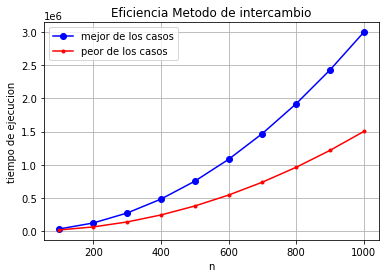

In [ ]:
import matplotlib.pyplot as plt

fig, grafica = plt.subplots(facecolor='w', edgecolor='k')
grafica.plot(nv,peor,marker='o',color='blue')
grafica.plot(nv,mejor,marker='.',color='red')

grafica.set_xlabel('n')
grafica.set_ylabel('tiempo de ejecucion')
grafica.grid(True)
grafica.legend(['mejor de los casos','peor de los casos'])

plt.title('Eficiencia Metodo de intercambio')
plt.show()


#La notación Big-O

Como hemos visto el comportamiento del algoritmo sigue un polinomio de segundo grado, y teoricmamente la ejcución del algorimo para una entrada dada, siempre caerá entre la línea azul y roja. 

Pero recuerde que el objetivo final de este analisis es comparar dos o más algoritmos que resuelven el mismo problema y de terminar cuál de ellos es mejor.

Una forma de comparar el comportamiento, es establecer un mínimo, del cual estemos seguros el agoritmo no podrá bajar en terminos de su tiempo de ejecución. Una posible qproximación la establece la denominada **notación Big-O**, esta notación establece un limite inferior (cota inferior) por debajo de la cual nuestro algoritmo no podrá bajar en terminos de ejecución.

Una posible cota inferior para nuestro algoritmo es **`n^2`**, es decir olvidar el factor lineal y el independiente y quedarnos solamente con el termino cuadrático 

In [ ]:
nv = np.linspace(100,1000,10)
cotaInferior = []
for n in nv:
  cotaInferior.append(n**2)

print(nv)
print(cotaInferior)

[ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
[10000.0, 40000.0, 90000.0, 160000.0, 250000.0, 360000.0, 490000.0, 640000.0, 810000.0, 1000000.0]


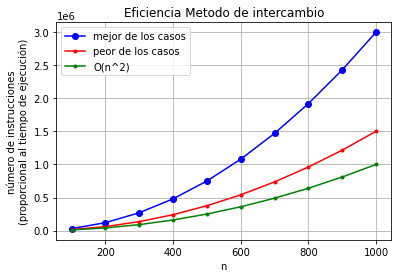

In [ ]:
import matplotlib.pyplot as plt

fig, grafica = plt.subplots(facecolor='w', edgecolor='k')
grafica.plot(nv,peor,marker='o',color='blue')
grafica.plot(nv,mejor,marker='.',color='red')
grafica.plot(nv,cotaInferior,marker='.',color='green')

grafica.set_xlabel('n')
grafica.set_ylabel('número de instrucciones\n(proporcional al tiempo de ejecución)')
grafica.grid(True)
grafica.legend(['mejor de los casos','peor de los casos','O(n^2)'])

plt.title('Eficiencia Metodo de intercambio')
plt.show()

Como puede apreciarse esta cota (marcada en verde es menor que el mejor o el peor de los caso y marca efectivamente un limite abajo del cual nunca nuestro algoritmo estará. **se dice entonces que nuestro algorimo es de orden n^2** que tambien se denota como: **O(n^2)**

#Un caso práctico

A continuacion evaluaremos el algorimo de intercambio en terminos del tiempo de ejecuión, para ello determinaremos la hora a la que comienza a ejecutarse el algoritmo, luego ejecutaremos el algoritmo y determinaremos la hora a la que terminó, la diferencia entre estas dos horas es el tiempo que tardó en ejecutarse el algorimo.

In [3]:
# vector: arreglo no ordenado
# resultado: el vector está ordenado
def ordenamiento(vector):

  n = len(vector)
  pivote = 0
  while pivote<n-1:
    k = pivote+1
    while (k<n):
      if vector[pivote]>vector[k]:
        t = vector[pivote]
        vector[pivote] = vector[k]
        vector[k] = t
      k += 1
    pivote += 1
  return 

v = [12,3,41,5,3,7]

# observe que el vector es modificado
# porque las listas son pasadas siempre por referencia
# a las funciones
ordenamiento(v)

print(v)


[3, 3, 5, 7, 12, 41]


In [7]:
# Crea un vector de n elementos
# si tipo = 1  genera el vector ordenado de manera creciente
# si tipo = 2 genera el vector ordenado de manera decreciente
# en cualquier otro caso genera un vector aleatorio (valor por default=0)
import random

def generaVector(n,tipo=0):
  '''
  n : tamaño del vector a generar
  tipo: tipo de vector a generar
      si tipo = 1  genera el vector ordenado de manera creciente
      si tipo = 2 genera el vector ordenado de manera decreciente
      en cualquier otro caso genera un vector aleatorio (valor por default=0)
  '''
  if tipo == 1:
    v = list(range(0,n))
  elif tipo == 2:
    v = list(range(n-1,-1,-1))
  else:
    v = random.sample(list(range(0,n)),n)
  return v

n = int(input('¿Tamaño del arreglo?'))
v = generaVector(n)
print(v)
v = generaVector(n,1)
print(v)
v = generaVector(n,2)
print(v)





¿Tamaño del arreglo?10
[4, 1, 8, 6, 0, 2, 3, 5, 9, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [9]:
#evaluacion del tiempo de ejecución

import time

n = int(input('¿Tamaño del arreglo?'))
v = generaVector(n,0)
inicio = time.time()
ordenamiento(v)
fin = time.time()

print(f'Tiempo de ejecución vector desordenado: {fin-inicio} micro segundos')

v = generaVector(n,1)
inicio = time.time()
ordenamiento(v)
fin = time.time()

print(f'Tiempo de ejecución vector ascendente: {fin-inicio} micro segundos')

v = generaVector(n,2)
inicio = time.time()
ordenamiento(v)
fin = time.time()

print(f'Tiempo de ejecución vector descendente: {fin-inicio} micro segundos')


¿Tamaño del arreglo?10
Tiempo de ejecución vector desordenado: 5.078315734863281e-05 micro segundos
Tiempo de ejecución vector ascendente: 4.458427429199219e-05 micro segundos
Tiempo de ejecución vector descendente: 4.7206878662109375e-05 micro segundos


Con base en lo anterior generaremos una grafica del comportamiento del método de ordenamiento. Para ello generaremos vectores de diferentes tamaños y evaluaremos el tiempo que tarda el algoritmo en ordenar, con los tiempo crearemos una tabla que correlacione numero de elementos vs tiempo de ejecución.

Note que el vector puede: estar ordenado ascendentement, ordenado descendentement o desordenado.

##Evalución de ordenamiento de un arreglo desordenado


In [14]:
def cronometra(v,f=ordenamiento):
  '''
  determina el tiempo de ejecución de la funcion que recibe como parametro
  v es el vector a ordenar, no se modific dentro de la función porque se hace 
  una copia local del vector
  '''
  vp = v[:]
  inicio = time.time()
  f(vp)
  fin = time.time() 
  return fin-inicio 

#  tamaño de los vectores que se evaluaran
nv = [1000,2000,4000,8000,10000]
t = []
for nk in nv:
  print(f'calculando para {nk} = ',end='')
  v = generaVector(nk)
  tk = cronometra(v)
  print(f'{tk} micro segs.')
  t.append(tk)

print(f'vector nv = {n}')
print(f'vector t = {t}')



calculando para 1000 = 0.1021566390991211 micro segs.
calculando para 2000 = 0.4188532829284668 micro segs.
calculando para 4000 = 1.6509697437286377 micro segs.
calculando para 8000 = 6.529252529144287 micro segs.
calculando para 10000 = 10.600013971328735 micro segs.
vector nv = [1000, 2000, 4000, 8000, 10000]
vector t = [0.1021566390991211, 0.4188532829284668, 1.6509697437286377, 6.529252529144287, 10.600013971328735]


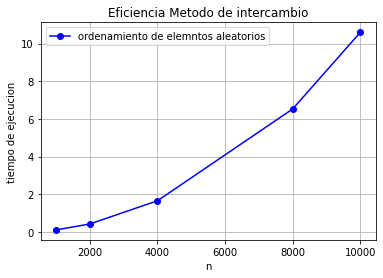

In [15]:
import matplotlib.pyplot as plt

fig, grafica = plt.subplots(facecolor='w', edgecolor='k')
grafica.plot(nv,t,marker='o',color='blue')

grafica.set_xlabel('n')
grafica.set_ylabel('tiempo de ejecucion')
grafica.grid(True)
grafica.legend(['ordenamiento de elemntos aleatorios'])

plt.title('Eficiencia Metodo de intercambio')
plt.show()